In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [63]:
X=df.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [64]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [65]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [66]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [67]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [69]:
classifier=Sequential()

In [93]:
#Adding first input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [71]:
#Adding first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [72]:
#Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [73]:
# Adding output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [74]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [76]:
## Early Stopping
import tensorflow as tf

In [77]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [78]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs= 100,callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.4133 - accuracy: 0.8209 - val_loss: 0.3696 - val_accuracy: 0.8455
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3605 - accuracy: 0.8511 - val_loss: 0.3674 - val_accuracy: 0.8489
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8531 - val_loss: 0.3657 - val_accuracy: 0.8466
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8569 - val_loss: 0.3609 - val_accuracy: 0.8504
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8543 - val_loss: 0.3611 - val_accuracy: 0.8485
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8615 - val_loss: 0.3699 - val_accuracy: 0.8474
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3416 - accuracy: 0.8619 - val_loss: 0.3707 - val_accuracy: 0.8466

In [79]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


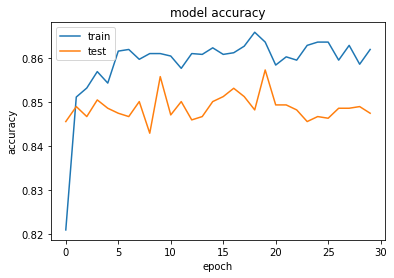

In [80]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [81]:
# summarize history for loss

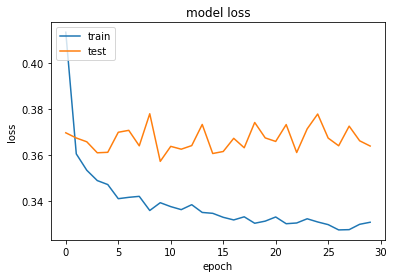

In [82]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [84]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
cn=confusion_matrix(y_test,y_pred)
cn

array([[1509,   86],
       [ 199,  206]], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

In [89]:
classifier.get_weights()

[array([[ 0.24281614, -0.43657792, -0.62534946, -0.20535463,  0.04473756,
          0.09640862,  0.03967567, -0.33801833,  0.1584325 , -1.34675   ,
          0.23644139],
        [-1.5853438 ,  1.8057417 ,  2.3180528 ,  0.42278665, -0.83151716,
          1.8853874 ,  2.9659219 , -1.3356034 ,  0.80141073, -1.4658393 ,
          1.11752   ],
        [-0.54263675,  0.2933441 , -0.19994356,  0.54199195,  0.225585  ,
         -0.7915061 ,  0.49665377,  0.8668233 ,  0.83283305,  0.44765744,
         -0.2701279 ],
        [-0.9150227 , -2.3044472 , -0.33343434,  0.69441485, -1.021406  ,
          0.35095295, -0.23258616, -0.27829432, -1.27722   ,  0.0041102 ,
          2.432101  ],
        [ 0.6228797 , -3.3432767 , -0.6097904 ,  2.985615  ,  3.4451535 ,
         -0.48854837,  1.7943825 ,  0.30818796, -0.13732451,  0.22935455,
          2.3125193 ],
        [-0.20974222, -0.21648782, -0.2533389 , -0.4374489 ,  0.3536515 ,
         -0.5678807 , -0.14563635, -1.1801969 ,  0.05336454, -0.3010106